In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

case_to_evaluate="9_3_1"

# Load data


In [243]:
combined_imputed_cells = pd.read_csv(f"data/{case_to_evaluate}/distance_based/combined_imputed_cells.csv")
combined_replaced_cells = pd.read_csv(f"data/{case_to_evaluate}/distance_based/combined_replaced_cells.csv")
combined_test_cells = pd.read_csv(f"data/{case_to_evaluate}/distance_based/combined_test_cells.csv")
combined_test_cells

,Mean Neighbor Intensity pERK,Mean Neighbor Intensity Rad51,Mean Neighbor Intensity CCND1,Mean Neighbor Intensity Vimentin,Mean Neighbor Intensity aSMA,Mean Neighbor Intensity Ecad,Mean Neighbor Intensity ER,Mean Neighbor Intensity PR,Mean Neighbor Intensity EGFR,Mean Neighbor Intensity pRB,...,Eccentricity,X_centroid,Y_centroid,Phenotype,# of Immune Cells,# of Neoplastic Epithelial Cells,# of Stroma Cells,Cell Neighborhood,Cell Neighborhood Encoded,Radius
0,0.201932,1.434665,-1.293920,-0.790151,-0.813580,0.455335,-1.523354,-0.650940,-2.877520,-2.222240,...,-3.029244,9462.282374,16.550360,Basal,0,1,0,Luminal,2,30
1,0.201932,1.434665,-1.293920,-0.790151,-0.813580,0.455335,-1.523354,-0.650940,-2.877520,-2.222240,...,0.337018,9426.822581,28.779032,Basal,0,1,0,Luminal,2,30
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.195640,9382.717557,17.938931,Basal,0,0,0,Unknown,5,30
3,0.499033,1.490248,-1.764280,-0.913757,-0.863420,-0.235042,-1.964929,-2.812892,-3.351614,-2.499022,...,0.367728,9445.007916,26.511873,Luminal,0,2,0,Basal,0,30
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.658821,762.274809,1138.732824,Basal,0,0,0,Unknown,5,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247105,-4.923674,-5.000000,-4.268401,-1.824450,-2.433938,-2.833936,-5.000000,-2.614555,-3.555589,-2.586672,...,0.290315,6988.286624,10657.254777,Basal,0,5,0,Basal,0,125
247106,-4.923674,-5.000000,-4.290667,-1.853729,-2.431883,-2.825474,-5.000000,-2.613961,-3.529170,-2.540852,...,-0.632548,6932.267606,10661.260563,Basal,0,5,0,Basal,0,125
247107,-4.923674,-5.000000,-4.294984,-1.870892,-2.438690,-2.827264,-5.000000,-2.600089,-3.529897,-2.544884,...,0.023226,6923.196296,10674.629630,Basal,0,5,0,Basal,0,125
247108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.720498,7219.142241,10978.607759,Basal,0,0,0,Unknown,5,125


# Examine data

## Check replaced data

Mean intensities with 0s refer to cells without neighbors

In [244]:
combined_replaced_cells.head()

,Mean Neighbor Intensity pERK,Mean Neighbor Intensity Rad51,Mean Neighbor Intensity CCND1,Mean Neighbor Intensity Vimentin,Mean Neighbor Intensity aSMA,Mean Neighbor Intensity Ecad,Mean Neighbor Intensity ER,Mean Neighbor Intensity PR,Mean Neighbor Intensity EGFR,Mean Neighbor Intensity pRB,...,Eccentricity,X_centroid,Y_centroid,Phenotype,# of Immune Cells,# of Neoplastic Epithelial Cells,# of Stroma Cells,Cell Neighborhood,Cell Neighborhood Encoded,Radius
0,0.201932,1.434665,-1.29392,-0.790151,-0.81358,0.455335,-1.523354,-0.650940,-2.877520,-2.222240,...,-3.029244,9462.282374,16.550360,Basal,0,1,0,Luminal,2,30
1,0.201932,1.434665,-1.29392,-0.790151,-0.81358,0.455335,-1.523354,-0.650940,-2.877520,-2.222240,...,0.337018,9426.822581,28.779032,Basal,0,1,0,Luminal,2,30
2,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.195640,9382.717557,17.938931,Basal,0,0,0,Unknown,5,30
3,0.499033,1.490248,-1.76428,-0.913757,-0.86342,-0.235042,-1.964929,-2.812892,-3.351614,-2.499022,...,0.367728,9445.007916,26.511873,Luminal,0,2,0,Basal,0,30
4,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.658821,762.274809,1138.732824,Basal,0,0,0,Unknown,5,30


In [245]:
combined_replaced_cells["# of Neighbors"] = combined_replaced_cells["# of Immune Cells"] + combined_replaced_cells["# of Neoplastic Epithelial Cells"] + combined_replaced_cells["# of Stroma Cells"]
combined_replaced_cells["# of Neighbors"].value_counts()

9      6690
8      6687
10     6195
7      6001
11     5167
       ... 
242       2
223       2
225       2
231       1
213       1
Name: # of Neighbors, Length: 260, dtype: int64

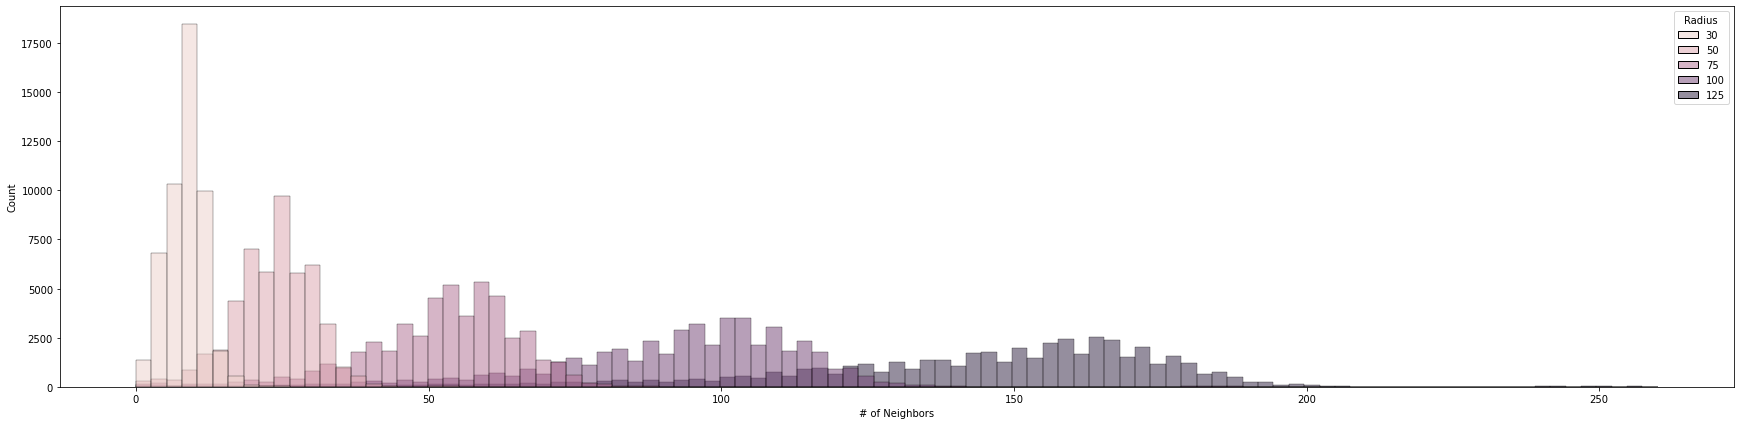

In [246]:
fig = plt.figure()
ax = sns.histplot(data=combined_replaced_cells, x="# of Neighbors", hue="Radius")
#plt.xticks(combined_replaced_cells["# of Neighbors"].unique())
fig.set_size_inches(30,7)
plt.show()

## Count NAs per row

20% replaced data should yield a mean of 5 replaced features

In [247]:
combined_replaced_cells.isna().sum(axis=1).mean()

5.0

## Test Data

In [248]:
# Available Distances

combined_test_cells["Radius"].unique()

array([ 30,  50,  75, 100, 125])

# Index Replacments

In [249]:
index_replacements = pd.read_csv(f"data/{case_to_evaluate}/index_replacements.csv")
index_replacements = index_replacements.T.to_dict()

print(len(index_replacements))

49422


# Load imputed features

In [250]:
features = pd.read_csv(f"data/{case_to_evaluate}/distance_based/features_to_impute.csv")
features = features["0"].to_list()
features

['pERK',
 'Rad51',
 'CCND1',
 'Vimentin',
 'aSMA',
 'Ecad',
 'ER',
 'PR',
 'EGFR',
 'pRB',
 'CD45',
 'Ki67',
 'CK19',
 'p21',
 'CK14',
 'AR',
 'cPARP',
 'CK17',
 'CK7',
 'HER2',
 'Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Solidity',
 'Extent',
 'Eccentricity',
 'X_centroid',
 'Y_centroid']

# R2 score calculation

In [251]:
from typing import List, Dict
from sklearn.metrics import r2_score

def evaluate_performance(features: List, index_replacements: Dict, test_data: pd.DataFrame,
                             imputed_data: pd.DataFrame):
        """
        Evaluates the performance per feature
        @param features:
        @param index_replacements:
        @param test_data:
        @param imputed_data:
        @return: Returns a dataframe with r2 scores for performance evaluation
        """
        score_data: List = []

        for feature in features:
            if "X_centroid" in feature or "Y_centroid" in feature or "Origin" in feature:
                continue

            # Store all cell indexes, to be able to select the correct cells later for r2 comparison
            cell_indexes_to_compare: list = []
            for key, replaced_features in index_replacements.items():
                key = int(key)
                replaced_features = list(replaced_features.values())
                
                if feature in replaced_features:
                    cell_indexes_to_compare.append(key)
           
            score = r2_score(test_data[feature].loc[cell_indexes_to_compare],
                                  imputed_data[feature].loc[cell_indexes_to_compare])
                    
            score_data.append({
                "Feature": feature,
                "Score": score if score >= 0 else 0
            })

        return pd.DataFrame().from_records(score_data)

In [252]:
distance = 30

selected_test_cells = combined_test_cells[combined_test_cells["Radius"] == distance].reset_index(drop=True)
selected_imputed_cells = combined_imputed_cells[combined_imputed_cells["Radius"] == distance].reset_index(drop=True)

#selected_imputed_cells.filter(regex=("Mean *"))
selected_imputed_cells.filter(features)
#selected_test_cells.filter(features)

,pERK,Rad51,CCND1,Vimentin,aSMA,Ecad,ER,PR,EGFR,pRB,...,cPARP,CK17,CK7,HER2,Area,MajorAxisLength,MinorAxisLength,Solidity,Extent,Eccentricity
0,-0.075063,1.363341,-2.079380,-1.029402,-1.004643,-0.527749,-2.448966,-5.000000,-2.432338,-1.917509,...,-0.966507,-1.512636,-2.292213,-3.302643,2.890842,1.851295,3.383035,0.365452,0.484119,-3.029244
1,1.073129,0.250274,-1.449179,-0.798113,-0.722197,0.057665,-1.480892,-0.625783,-3.158165,-2.382950,...,-0.778287,-0.793337,-0.531153,-0.552202,3.147427,2.992259,2.783729,-0.431529,0.442540,0.337018
2,-2.075401,0.843259,-4.182582,-1.144706,-1.963758,-2.994724,-5.000000,-3.983931,-3.655767,-2.087559,...,-0.775506,-0.765644,-0.473545,-0.555603,-0.513547,-1.144813,0.040201,0.833818,0.899842,-1.195640
3,0.201932,1.434665,-1.293920,-0.790151,-0.265139,0.455335,-1.523354,-0.650940,-2.877520,-2.222240,...,-0.771902,-0.774182,-0.483725,-0.552217,1.555631,1.882830,1.579510,0.635268,0.775870,0.367728
4,-4.343033,-5.000000,-3.123662,-1.941213,-1.017511,-2.564082,-2.269987,-2.621053,-3.179710,-2.029675,...,-0.778952,-0.726063,-0.557012,-0.702142,-0.513547,-1.026419,-0.083643,0.544482,1.287863,-0.658821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49417,-5.000000,-5.000000,-4.371894,-1.979290,-2.439423,-2.817357,-2.658812,-2.594269,-2.285948,-2.416786,...,-0.764125,-0.760799,-0.547095,-0.417025,-0.087169,-0.079415,-0.229905,0.327878,0.103884,0.290315
49418,-5.000000,-5.000000,-4.260564,-1.832897,-2.449700,-2.859668,-5.000000,-1.961172,-2.636642,-2.645884,...,-0.766477,-0.765359,-0.628326,-0.597361,-0.323660,-0.762577,0.713712,0.060519,-0.194903,-0.632548
49419,-5.000000,-5.000000,-4.238978,-1.747082,-2.415667,-2.850719,-5.000000,-2.666599,-3.593722,-2.625723,...,-1.047812,-0.769750,-0.556552,-0.618881,1.189682,0.777181,1.169202,0.158741,0.385795,0.023226
49420,-5.000000,-4.763170,-4.411618,-1.148895,-2.456539,-2.860677,-5.000000,-2.610337,-3.593344,-2.623440,...,-0.770053,-0.774550,-0.689510,-0.624305,0.832457,1.550216,-0.212544,0.664955,0.553721,0.720498


In [253]:
combined_r2_scores_data = []
for radius in combined_test_cells["Radius"].unique():
    selected_test_cells = combined_test_cells[combined_test_cells["Radius"] == radius].reset_index(drop=True)
    selected_imputed_cells = combined_imputed_cells[combined_imputed_cells["Radius"] == radius].reset_index(drop=True)
    r2_scores = evaluate_performance(features, index_replacements, selected_test_cells, selected_imputed_cells)
    r2_scores["Radius"] = radius
    combined_r2_scores_data.append(r2_scores)
    
combined_r2_scores = pd.concat(combined_r2_scores_data)
combined_r2_scores.to_csv(f"data/{case_to_evaluate}/distance_based/combined_r2_scores.csv", index=False)
combined_r2_scores

49422
49422
49422
49422
49422


,Feature,Score,Radius
0,pERK,0.353164,30
1,Rad51,0.282505,30
2,CCND1,0.403665,30
3,Vimentin,0.328918,30
4,aSMA,0.209787,30
...,...,...,...
21,MajorAxisLength,0.167203,125
22,MinorAxisLength,0.220546,125
23,Solidity,0.000000,125
24,Extent,0.000000,125


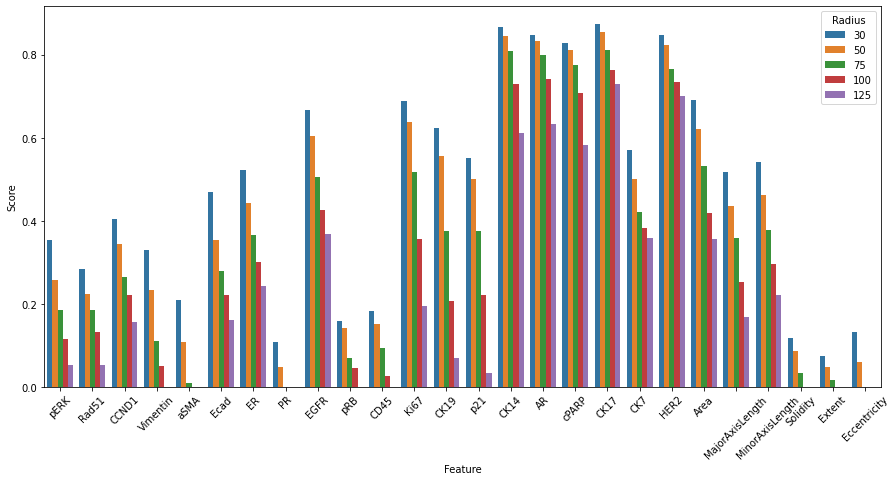

In [254]:
fig = plt.figure()
sns.barplot(x="Feature", y="Score",hue="Radius", data=combined_r2_scores)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
fig.set_size_inches(15,7)
plt.show()